In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Bases a serem usadas
bases_originais = [
    "vgg19_avg_256.csv",
    "vgg16_max_256.csv",
    "vgg16_max_128.csv",
    "vgg16_avg_128.csv",
    "vgg19_max_256.csv",
    "vgg16_avg_256.csv"
]

data_dir = '../../data/'
bases_pca = [nome.replace(".csv", "_pca10.csv") for nome in bases_originais]
bases_final = bases_originais + bases_pca

# Configurações
funcoes_ativacao = ['identity', 'logistic', 'tanh', 'relu']
avaliacoes = ["70/30 Split", "10-fold CV"]

# Dicionário para armazenar resultados
resultados = {}

for nome_arquivo in bases_final:
    caminho = os.path.join(data_dir, nome_arquivo)
    if not os.path.exists(caminho):
        print(f"Aviso: Arquivo não encontrado: {nome_arquivo}")
        continue

    df = pd.read_csv(caminho)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X = StandardScaler().fit_transform(X)

    for metodo in avaliacoes:
        chave = f"{nome_arquivo} - {metodo}"
        resultados[chave] = {}

        for func in funcoes_ativacao:
            mlp = MLPClassifier(activation=func, max_iter=500, random_state=42)

            if metodo == "70/30 Split":
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, stratify=y, random_state=42
                )
                acc = mlp.fit(X_train, y_train).score(X_test, y_test)
            else:
                acc = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()

            resultados[chave][func] = acc

# Organiza em DataFrame com colunas = funções de ativação
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados.index.name = "Base - Avaliação"

# Salva em CSV
df_resultados.to_csv("resultados_ativacao_mlp.csv")

print("✅ Resultados MLP salvos em: resultados_ativacao_mlp.csv")


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Bases a serem usadas
bases_originais = [
    "vgg19_avg_256.csv",
    "vgg16_max_256.csv",
    "vgg16_max_128.csv",
    "vgg16_avg_128.csv",
    "vgg19_max_256.csv",
    "vgg16_avg_256.csv"
]

data_dir = '../../data/'
bases_pca = [nome.replace(".csv", "_pca10.csv") for nome in bases_originais]
bases_final = bases_originais + bases_pca

# Configurações
# Solvers a testar
solvers = ['sgd', 'adam']
funcao_ativacao = 'tanh'
avaliacoes = ["70/30 Split", "10-fold CV"]

# Dicionário para armazenar resultados
resultados = {}

for nome_arquivo in bases_final:
    caminho = os.path.join(data_dir, nome_arquivo)
    if not os.path.exists(caminho):
        print(f"Aviso: Arquivo não encontrado: {nome_arquivo}")
        continue

    df = pd.read_csv(caminho)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X = StandardScaler().fit_transform(X)

    for metodo in avaliacoes:
        chave = f"{nome_arquivo} - {metodo}"
        resultados[chave] = {}

        for sol in solvers:
            mlp = MLPClassifier(activation=funcao_ativacao, max_iter=500, random_state=42, solver=sol)

            if metodo == "70/30 Split":
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, stratify=y, random_state=42
                )
                acc = mlp.fit(X_train, y_train).score(X_test, y_test)
            else:
                acc = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()

            resultados[chave][sol] = acc

# Organiza em DataFrame com colunas = funções de ativação
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados.index.name = "Base - Avaliação"

# Salva em CSV
df_resultados.to_csv("resultados_solver_mlp.csv")

print("✅ Resultados MLP salvos em: resultados_solver_mlp.csv")


In [13]:
# Bases a serem usadas
bases_originais = [
    "vgg19_avg_256.csv",
    "vgg16_max_256.csv",
    "vgg16_max_128.csv",
    "vgg16_avg_128.csv",
    "vgg19_max_256.csv",
    "vgg16_avg_256.csv"
]

data_dir = '../../data/'
bases_pca = [nome.replace(".csv", "_pca10.csv") for nome in bases_originais]
bases_final = bases_originais + bases_pca

In [21]:


solver = 'adam'
funcao_ativacao = 'tanh'
avaliacoes = ["70/30 Split", "10-fold CV"]

# Calcula valores de neurônios para testar
hidden_neurons = [2, 10, 50, 200, 500]

# Dicionário para armazenar resultados
resultados = {}

for nome_arquivo in bases_final:
    caminho = os.path.join(data_dir, nome_arquivo)
    if not os.path.exists(caminho):
        print(f"Aviso: Arquivo não encontrado: {nome_arquivo}")
        continue

    df = pd.read_csv(caminho)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X = StandardScaler().fit_transform(X)


    for metodo in avaliacoes:
        chave = f"{nome_arquivo} - {metodo}"
        resultados[chave] = {}

        for HLS in hidden_neurons:
            mlp = MLPClassifier(activation=funcao_ativacao, max_iter=2000, random_state=42, solver=solver, hidden_layer_sizes=(HLS,))

            if metodo == "70/30 Split":
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, stratify=y, random_state=42
                )
                acc = mlp.fit(X_train, y_train).score(X_test, y_test)
            else:
                acc = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()

            resultados[chave][HLS] = acc

if os.path.exists("resultados_HidenlayerSize_mlp.csv"):
    os.remove("resultados_HidenlayerSize_mlp.csv")


# Organiza em DataFrame com colunas = funções de ativação
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados.index.name = "Base - Avaliação"

# Salva em CSV
df_resultados.to_csv("resultados_HidenlayerSize_mlp.csv")

print("✅ Resultados MLP salvos em: resultados_HidenlayerSize_mlp.csv")


✅ Resultados MLP salvos em: resultados_HidenlayerSize_mlp.csv


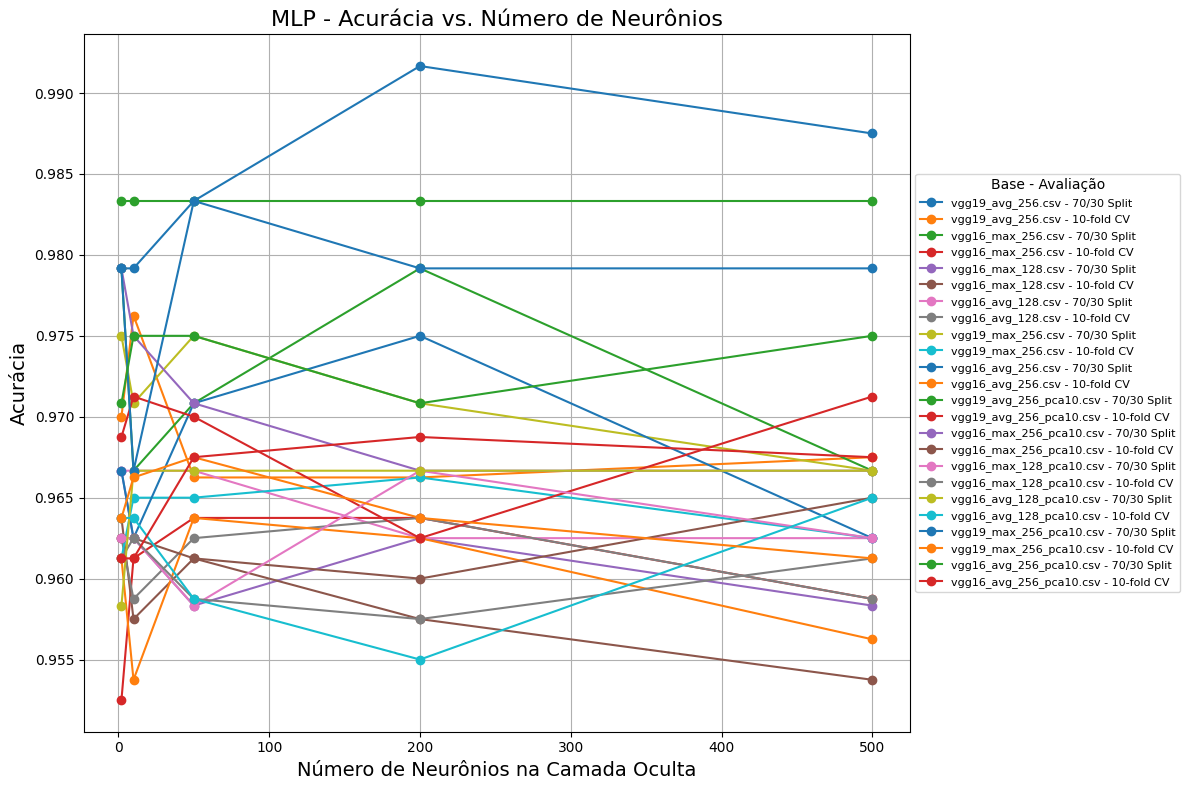

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) Ler o CSV com seus resultados ===
df = pd.read_csv("resultados_HidenlayerSize_mlp.csv", index_col=0)

# === 2) Extrair números de neurônios ===
# As colunas são os hidden_neurons: 2, 10, 50, 200, 500
hidden_neurons = [int(col) for col in df.columns]

# === 3) Criar figura ===
plt.figure(figsize=(12, 8))

# === 4) Plotar cada linha ===
for idx, row in df.iterrows():
    plt.plot(hidden_neurons, row.values, marker='o', label=idx)

# === 5) Rótulos ===
plt.xlabel("Número de Neurônios na Camada Oculta", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.title("MLP - Acurácia vs. Número de Neurônios", fontsize=16)
plt.grid(True)

# === 6) Legenda ===
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, ncol=1, title="Base - Avaliação")

# === 7) Mostrar ===
plt.tight_layout()
plt.show()


In [ ]:

solver = 'adam'
funcao_ativacao = 'tanh'
avaliacoes = ["70/30 Split", "10-fold CV"]

# Calcula valores de neurônios para testar
hidden_neurons = 50
taxas_aprendizado = [0.0001, 0.001, 0.01, 0.1]
# Dicionário para armazenar resultados
resultados = {}

for nome_arquivo in bases_final:
    caminho = os.path.join(data_dir, nome_arquivo)
    if not os.path.exists(caminho):
        print(f"Aviso: Arquivo não encontrado: {nome_arquivo}")
        continue

    df = pd.read_csv(caminho)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X = StandardScaler().fit_transform(X)


    for metodo in avaliacoes:
        chave = f"{nome_arquivo} - {metodo}"
        resultados[chave] = {}

        for taxa in taxas_aprendizado:
            mlp = MLPClassifier(activation=funcao_ativacao, 
                                max_iter=2000, 
                                random_state=42, 
                                solver=solver, 
                                hidden_layer_sizes=(HLS,), 
                                learning_rate_init = taxa)
            
            if metodo == "70/30 Split":
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, stratify=y, random_state=42
                )
                acc = mlp.fit(X_train, y_train).score(X_test, y_test)
            else:
                acc = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()

            resultados[chave][taxa] = acc

if os.path.exists("resultados_TaxaAprendizado_mlp.csv"):
    os.remove("resultados_TaxaAprendizado_mlp.csv")


# Organiza em DataFrame com colunas = funções de ativação
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados.index.name = "Base - Avaliação"

# Salva em CSV
df_resultados.to_csv("resultados_TaxaAprendizado_mlp.csv")

print("✅ Resultados MLP salvos em: resultados_TaxaAprendizado_mlp.csv")


✅ Resultados MLP salvos em: resultados_TaxaAprendizado_mlp.csv


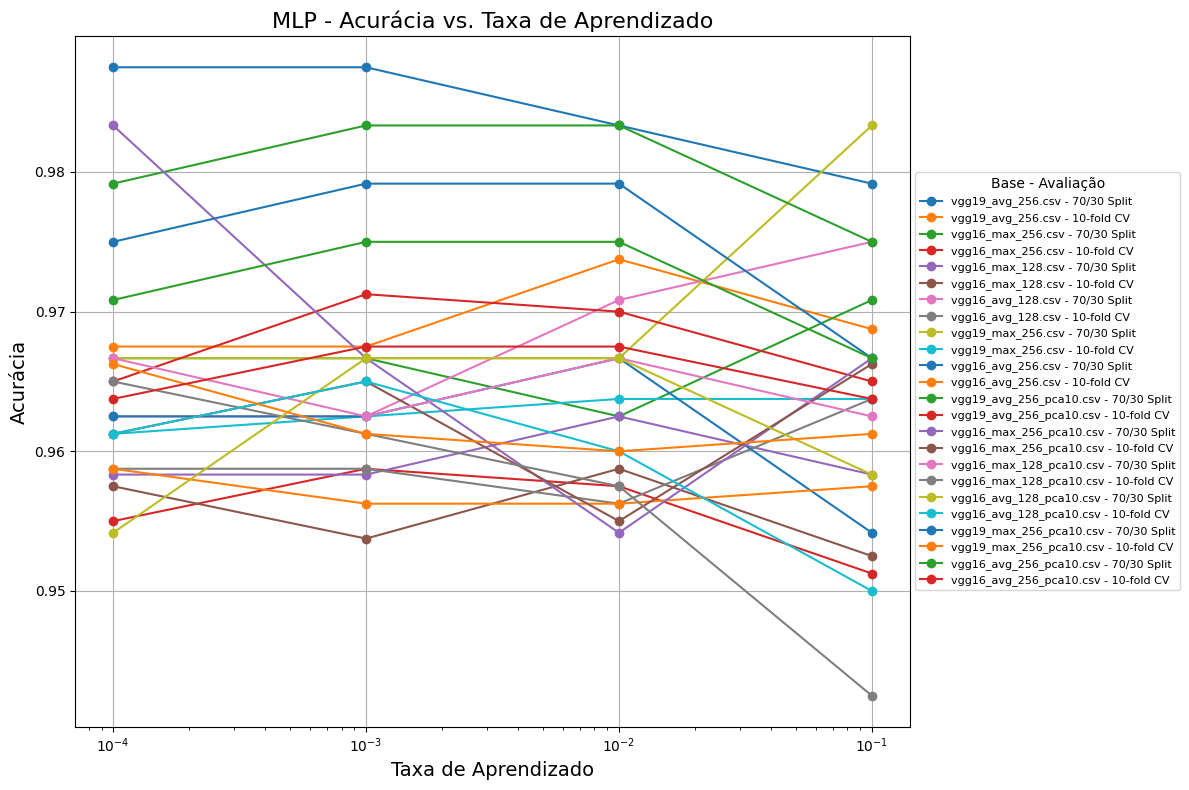

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) Ler CSV ===
df = pd.read_csv("resultados_TaxaAprendizado_mlp.csv", index_col=0)

# === 2) Extrair taxas como float ===
taxas_aprendizado = [float(col) for col in df.columns]

# === 3) Criar figura ===
plt.figure(figsize=(12, 8))

# === 4) Plotar ===
for idx, row in df.iterrows():
    plt.plot(taxas_aprendizado, row.values, marker='o', label=idx)

# === 5) Ajustes ===
plt.xlabel("Taxa de Aprendizado", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.title("MLP - Acurácia vs. Taxa de Aprendizado", fontsize=16)
plt.grid(True)

# ✅ Escala logarítmica no X
plt.xscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, ncol=1, title="Base - Avaliação")
plt.tight_layout()
plt.show()


In [28]:

solver = 'adam'
funcao_ativacao = 'tanh'
avaliacoes = ["70/30 Split", "10-fold CV"]

# Calcula valores de neurônios para testar
hidden_neurons = 50
taxa_aprendizado = [0.01]
numero_iteracoes = [500, 1000, 1500, 2000, 2500]
# Dicionário para armazenar resultados
resultados = {}

for nome_arquivo in bases_final:
    caminho = os.path.join(data_dir, nome_arquivo)
    if not os.path.exists(caminho):
        print(f"Aviso: Arquivo não encontrado: {nome_arquivo}")
        continue

    df = pd.read_csv(caminho)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X = StandardScaler().fit_transform(X)


    for metodo in avaliacoes:
        chave = f"{nome_arquivo} - {metodo}"
        resultados[chave] = {}

        for it in numero_iteracoes:
            mlp = MLPClassifier(activation=funcao_ativacao, 
                                max_iter=it, 
                                random_state=42, 
                                solver=solver, 
                                hidden_layer_sizes=(HLS,), 
                                learning_rate_init = taxa)
            
            if metodo == "70/30 Split":
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, stratify=y, random_state=42
                )
                acc = mlp.fit(X_train, y_train).score(X_test, y_test)
            else:
                acc = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()

            resultados[chave][it] = acc

if os.path.exists("resultados_TaxaAprendizado_mlp.csv"):
    os.remove("resultados_TaxaAprendizado_mlp.csv")


# Organiza em DataFrame com colunas = funções de ativação
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados.index.name = "Base - Avaliação"

# Salva em CSV
df_resultados.to_csv("resultados_Iteracoes_mlp.csv")

print("✅ Resultados MLP salvos em: resultados_Iteracoes_mlp.csv")


✅ Resultados MLP salvos em: resultados_Iteracoes_mlp.csv


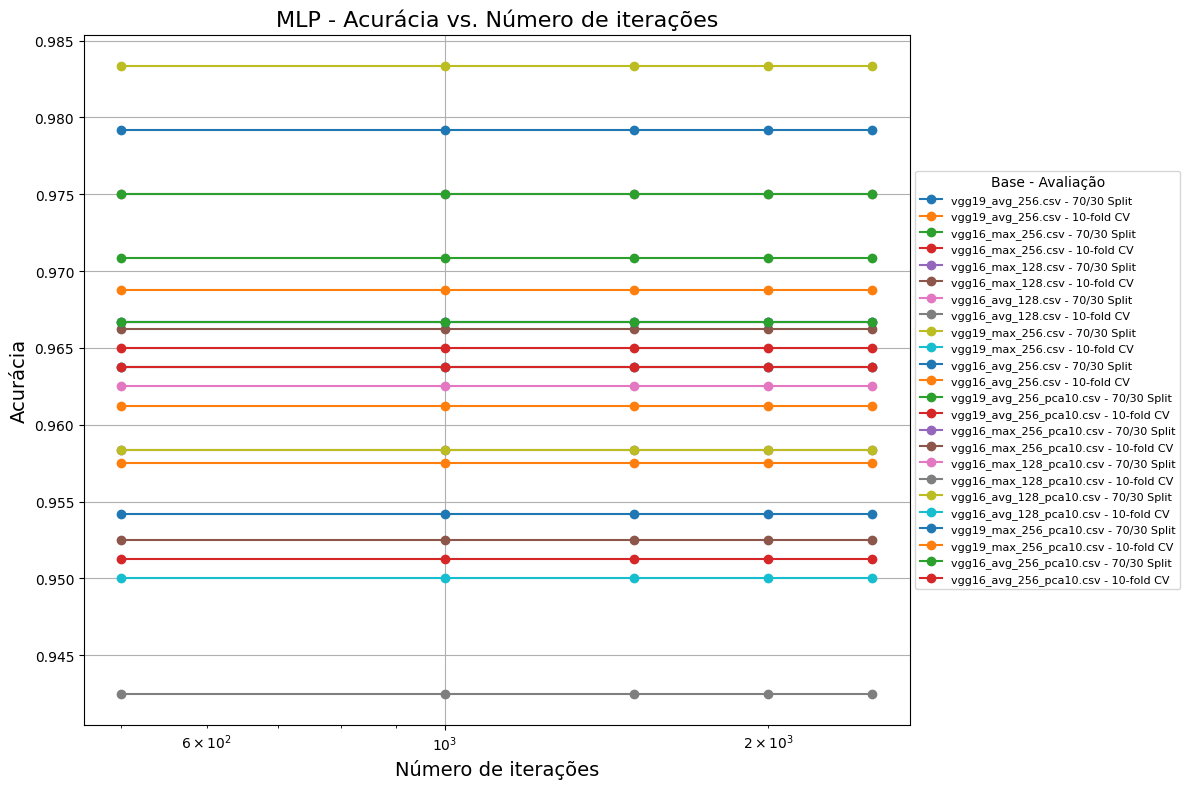

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) Ler CSV ===
df = pd.read_csv("resultados_Iteracoes_mlp.csv", index_col=0)

# === 2) Extrair taxas como float ===
numero_iteracoes = [int(col) for col in df.columns]

# === 3) Criar figura ===
plt.figure(figsize=(12, 8))

# === 4) Plotar ===
for idx, row in df.iterrows():
    plt.plot(numero_iteracoes, row.values, marker='o', label=idx)

# === 5) Ajustes ===
plt.xlabel("Número de iterações", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.title("MLP - Acurácia vs. Número de iterações", fontsize=16)
plt.grid(True)

# ✅ Escala logarítmica no X
plt.xscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, ncol=1, title="Base - Avaliação")
plt.tight_layout()
plt.show()


A última iteração da prática de MLP que termina testando as configurações.
Tendo sido as melhores configurações:

hidden_neurons = 50
taxa_aprendizado = 0.01
numero_iteracoes = 1000

Tendo sido escolhidas entre as seguintes opções:

hidden_neurons = [2, 10, 50, 200, 500]
taxas_aprendizado = [0.0001, 0.001, 0.01, 0.1]
max_iter = [500, 1000, 1500, 2000, 2500]


In [ ]:

solver = 'adam'
funcao_ativacao = 'tanh'
avaliacoes = ["70/30 Split", "10-fold CV"]

config = [
    [50, 0.01, 1000],
    [75, 0.01, 1000],
    [100, 0.01, 1000],
    [50, 0.005, 1000],
    [50, 0.001, 1000]
]

# Dicionário para armazenar resultados
resultados = {}

for nome_arquivo in bases_final:
    caminho = os.path.join(data_dir, nome_arquivo)
    if not os.path.exists(caminho):
        print(f"Aviso: Arquivo não encontrado: {nome_arquivo}")
        continue

    df = pd.read_csv(caminho)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X = StandardScaler().fit_transform(X)

    for metodo in avaliacoes:
        chave = f"{nome_arquivo} - {metodo}"
        resultados[chave] = {}

        for conf in config:
            HLS = conf[0]
            taxa = conf[1]
            it = conf[2]

            mlp = MLPClassifier(
                activation=funcao_ativacao,
                max_iter=it,
                random_state=42,
                solver=solver,
                hidden_layer_sizes=(HLS,),
                learning_rate_init=taxa
            )

            if metodo == "70/30 Split":
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, stratify=y, random_state=42
                )
                acc = mlp.fit(X_train, y_train).score(X_test, y_test)
            else:
                acc = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()

            nome_coluna = f"HLS{HLS}_LR{taxa}_IT{it}"
            resultados[chave][nome_coluna] = acc

# Remove arquivo antigo, se existir
if os.path.exists("resultados_Iteracoes_mlp.csv"):
    os.remove("resultados_Iteracoes_mlp.csv")

# Organiza em DataFrame com colunas = cada configuração
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados.index.name = "Base - Avaliação"

# Salva em CSV
df_resultados.to_csv("resultados_Iteracoes_mlp.csv")

print("✅ Resultados MLP salvos em: resultados_configuracoes_mlp.csv")


✅ Resultados MLP salvos em: resultados_Iteracoes_mlp.csv
